# Sentiment Analysis and Topic Modeling

In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prathma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prathma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import spacy # Spacy for lemmatization
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from collections import defaultdict
from collections import  Counter
import operator
import gensim.corpora as corpora
import math
from matplotlib import gridspec
from pprint import pprint

In [20]:
nlp = spacy.load('en_core_web_sm')

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
jsonData = pd.read_csv('filtered_data.csv', sep="|")

In [6]:
jsonData

,Unnamed: 0,category,headline,authors,link,short_description,date,Text,Section,Cleaned Text,Word Tokens,Filtered Tokens
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,there be 2 mass shootings in texas last week b...,"['there', 'be', '2', 'mass', 'shootings', 'in'...","['mass', 'shootings', 'texas', 'last', 'week',..."
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,"['will', 'smith', 'joins', 'diplo', 'and', 'ni...","['smith', 'joins', 'diplo', 'nicky', 'jam', 'w..."
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marrie for the first time at age 57...,"['hugh', 'grant', 'marrie', 'for', 'the', 'fir...","['hugh', 'grant', 'marrie', 'first', 'time', '..."
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,"['jim', 'carrey', 'blasts', 'castrato', 'adam'...","['jim', 'carrey', 'blasts', 'castrato', 'adam'..."
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies use donald trump poop bag t...,"['julianna', 'margulies', 'use', 'donald', 'tr...","['julianna', 'margulies', 'use', 'donald', 'tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,rim ceo thorsten hein significant plan for bla...,"['rim', 'ceo', 'thorsten', 'hein', 'significan...","['rim', 'ceo', 'thorsten', 'hein', 'significan..."
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stun by victoria azarenka in a...,"['maria', 'sharapova', 'stun', 'by', 'victoria...","['maria', 'sharapova', 'stun', 'victoria', 'az..."
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giant over patriots jet over colt among most...,"['giant', 'over', 'patriots', 'jet', 'over', '...","['giant', 'patriots', 'jet', 'colt', 'among', ..."
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49er linebacker bust for ...,"['aldon', 'smith', 'arrested', '49er', 'lineba...","['aldon', 'smith', 'arrested', '49er', 'lineba..."


In [7]:
jsonData['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [8]:
jsonData['headline'][8]

"Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film"

In [9]:
jsonData['short_description'][3960]

'The liquidation could put up to 33,000 U.S. jobs at risk.'

In [10]:
jsonData['Text']= jsonData["headline"].astype(str) +" " + jsonData["short_description"].astype(str)

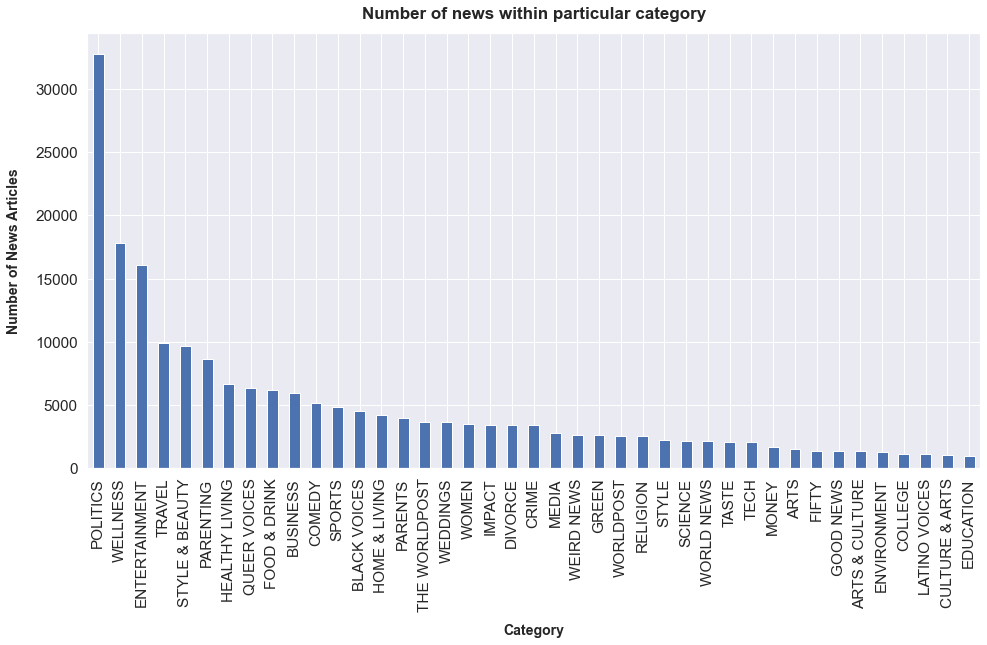

In [11]:
sns.set(font_scale=1.4)
jsonData['category'].value_counts().plot(kind="bar", figsize=(16, 8))
plt.xlabel("Category", labelpad=12, fontsize=14, fontweight="bold")
plt.ylabel("Number of News Articles", labelpad=14, fontsize=14, fontweight="bold")
plt.title("Number of news within particular category", fontsize=17, fontweight="bold", y=1.02);

## Sentiment Analysis using VADER

In [130]:
vader_analyzer = SentimentIntensityAnalyzer()
def getPolarity(text):
    stats=vader_analyzer.polarity_scores(text)
    if stats['compound'] >= 0.05 : 
        return 'positive'
  
    elif stats['compound'] <= - 0.05 : 
        return 'negative'
        
    else : 
        return 'neutral'  

In [131]:
jsonData['Sentiment']=jsonData['Text'].apply(getPolarity)

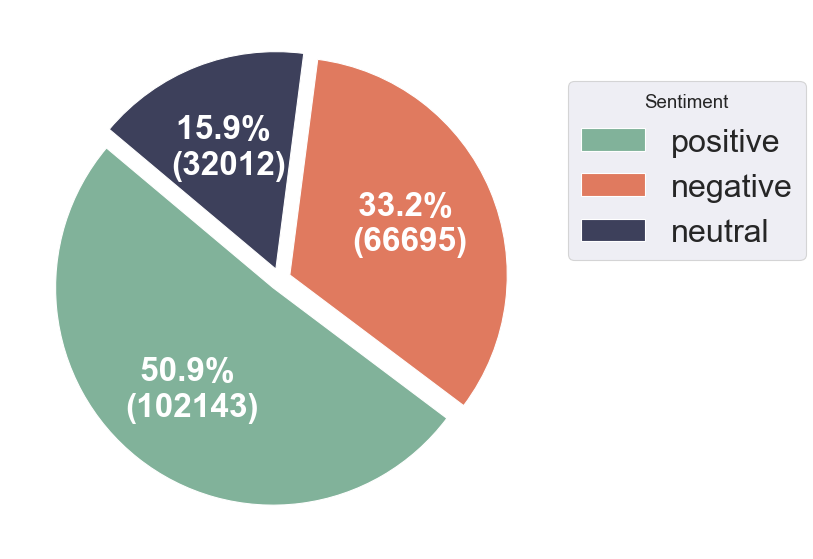

In [210]:
y = jsonData['Sentiment'].value_counts()
mylabels = y.index

fig, ax = plt.subplots(figsize=(24, 9), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(y, 
                                  autopct=lambda pct: func(pct, y),
                                  textprops=dict(color="w"), 
                                  colors=['#81b29a', '#e07a5f', '#3d405b'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, mylabels, title="Sentiment", loc="center left",fontsize= 'xx-large' ,bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=30, weight=700)
plt.show()

-----

## Topic Modeling

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
def get_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens
def get_filtered_tokens(tokens):
    tokens_filtered = [t for t in tokens if t not in stopwords and t.isdigit() == False]
    return tokens_filtered

In [13]:
jsonData['Word Tokens'] =jsonData['Cleaned Text'].apply(get_tokens)

In [14]:
jsonData['Filtered Tokens'] = jsonData['Word Tokens'].apply(get_filtered_tokens)

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = jsonData['Cleaned Text'].values.tolist()
data_words = list(sent_to_words(data))

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [17]:
len(bigram_mod.phrasegrams)

6115

In [18]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [19]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['mass_shooting', 'texas', 'last', 'week', 'tv', 'leave', 'husband', 'kill', 'child', 'day', 'america']]


In [22]:
print(data_lemmatized[:2])

[['mass_shooting', 'texas', 'last', 'week', 'tv', 'leave', 'husband', 'kill', 'child', 'day', 'america'], ['smith', 'join', 'diplo', 'nicky', 'jam', 'world', 'cup', 'official', 'song', 'course', 'song']]


In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


In [24]:
print(corpus[7:10])

[[(10, 2), (15, 1), (45, 1), (83, 1), (84, 1), (85, 1)], [(45, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 2), (92, 2), (93, 1), (94, 1)], [(10, 1), (45, 1), (85, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]]


### Topics Classification using LDA model

In [26]:
def buildLdaModel(numTopics):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=numTopics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=15,
                                       per_word_topics=True)
    return lda_model

In [29]:
def plot_top_words(lda, nb_topics, nb_words, k):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='#3d405b', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        

In [34]:
def saveTopicwords(lda , nb_topics, nb_words,fileName):
    topicName=[str("Topic_"+str(topic_id)) for topic_id  in range(nb_topics)]
    wordWeight=[lda.show_topic(topic_id, topn=nb_words)for topic_id  in range(nb_topics)]
    df=pd.DataFrame()
    df['topicName']=topicName
    df['wordWeight']=wordWeight
    print(df)
    df.to_csv(fileName, sep = '|')

#### Number of topics = 8

In [32]:
lda_model = buildLdaModel(8)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"dress" + 0.013*"hotel" + 0.010*"designer" + 0.009*"far" + '
  '0.009*"magazine" + 0.009*"point" + 0.008*"exercise" + 0.008*"room" + '
  '0.008*"water" + 0.007*"raise"'),
 (1,
  '0.022*"food" + 0.012*"idea" + 0.010*"poll" + 0.009*"party" + '
  '0.009*"challenge" + 0.008*"craft" + 0.007*"state" + 0.007*"consider" + '
  '0.007*"choose" + 0.007*"practice"'),
 (2,
  '0.040*"photo" + 0.017*"feel" + 0.016*"look" + 0.015*"check" + 0.015*"style" '
  '+ 0.014*"day" + 0.014*"home" + 0.011*"sure" + 0.010*"take" + '
  '0.010*"travel"'),
 (3,
  '0.041*"photo" + 0.031*"video" + 0.031*"divorce" + 0.019*"wear" + '
  '0.017*"marriage" + 0.014*"girl" + 0.013*"spring" + 0.012*"show" + '
  '0.009*"star" + 0.009*"new"'),
 (4,
  '0.015*"get" + 0.015*"good" + 0.014*"make" + 0.014*"love" + 0.014*"day" + '
  '0.012*"know" + 0.011*"child" + 0.011*"life" + 0.010*"photo" + 0.010*"time"'),
 (5,
  '0.013*"get" + 0.012*"tip" + 0.012*"summer" + 0.009*"good" + '
  '0.009*"relationship" + 0.008*"fear" + 0

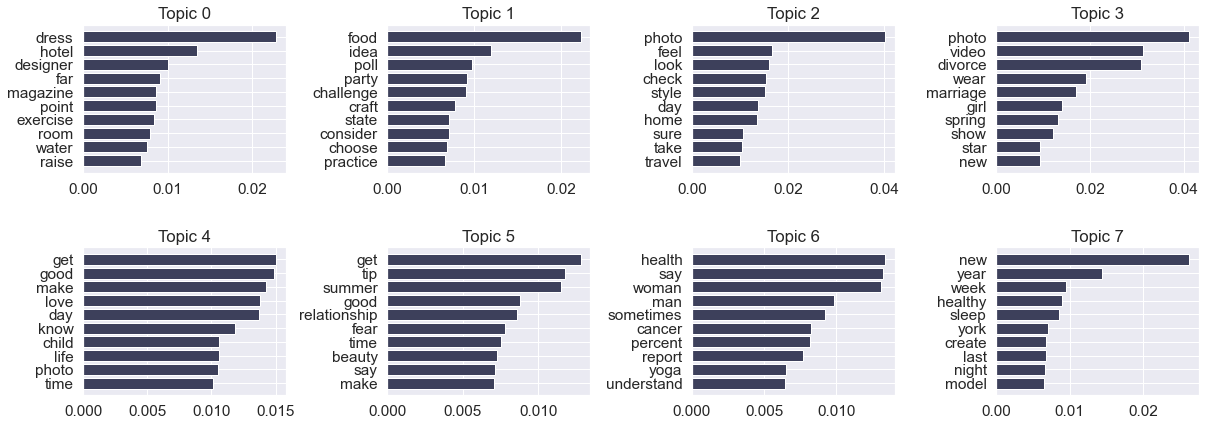

In [33]:
plot_top_words(lda_model, 8, 10, 8)

In [35]:
saveTopicwords(lda_model , 8, 10,'topics8_Words.csv')

  topicName                                         wordWeight
0   Topic_0  [(dress, 0.022862336), (hotel, 0.013485147), (...
1   Topic_1  [(food, 0.022286713), (idea, 0.011973248), (po...
2   Topic_2  [(photo, 0.04015393), (feel, 0.016643183), (lo...
3   Topic_3  [(photo, 0.041234557), (video, 0.03135749), (d...
4   Topic_4  [(get, 0.0150572825), (good, 0.014859781), (ma...
5   Topic_5  [(get, 0.012817944), (tip, 0.011774397), (summ...
6   Topic_6  [(health, 0.013363983), (say, 0.0132272355), (...
7   Topic_7  [(new, 0.026267167), (year, 0.014341458), (wee...


#### Number of topics = 5

In [ ]:
lda_model_5 = buildLdaModel(5)
pprint(lda_model_5.print_topics())
doc_lda = lda_model_5[corpus]

In [ ]:
plot_top_words(lda_model_5, 5, 10, 5)

In [ ]:
saveTopicwords(lda_model_5 , 5, 10, 'topics5_Words.csv')